In [14]:
# Импортируем специализированные модули Pandas и Numpy, не являющиеся частью стандартной библиотеки Python.
import pandas as pd
import numpy as np


In [15]:
# а также импортируем модули Seaborn, Matplotlib и Pydotplus для работы с графикой.
import matplotlib.pyplot as plt
import seaborn as sns
# Импортируем модуль tree из библиотеки sklearn для реализации алгоритмов решающих деревьев.
from sklearn import tree

In [16]:
# Импортируем модули, необходимые для визуализации дерева решений.
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)


In [17]:
# Прописываем пути до graphviz.
import os
os.environ["PATH"] += os.pathsep + "C:\Program Files (x86)\Graphviz2.38\bin" \
                      + os.pathsep + "C:\Program Files (x86)\Graphviz2.38"

# Устанавливаем размер области для построения графиков.
sns.set(rc={'figure.figsize': (9, 6)})

In [18]:
# Считываем тренировочный файл.
train_iris_data = pd.read_csv("D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\train_iris.csv", index_col=0)
# Считываем тестовый файл.
test_iris_data = pd.read_csv("D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\test_iris.csv", index_col=0)

In [19]:
# Отбросим колонки, не несущие важной информации для построения дерева решений.
# Отбрасываем не только предсказываемую species, но и первую колонку, так как она содержит id каждого экземпляра (цветка), а он для построения графика не нужен.
X_train_iris = train_iris_data.drop(['species'], axis=1)
X_test_iris = test_iris_data.drop(['species'], axis=1)

In [20]:
# Создадим переменные, которые будем предсказывать.
y_train_iris = train_iris_data.species
y_test_iris = test_iris_data.species


In [21]:
# Подберем оптимальное значение глубины обучения дерева.
# Зададим диапазон исследуемых значений.
max_iris_depth_values = range(1, 100)


In [22]:
# Обнулим DataFrame.
scores_iris_data = pd.DataFrame()

#  Задаем random seed.
rs = np.random.seed(0)


In [23]:
for max_iris_depth in max_iris_depth_values:
    # Изменяем глубину обучения дерева по циклу от 1 до 99 с шагом 1.
    clf_iris = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_iris_depth, random_state=rs)
    # Обучаем дерево решений (с ограниченной глубиной) на подмножестве train.
    clf_iris.fit(X_train_iris, y_train_iris)
    # Записываем в отдельную переменную число правильных ответов на обученной модели дерева
    # с ограниченной глубиной (подмножество train)
    train_iris_score = clf_iris.score(X_train_iris, y_train_iris)
    # Записываем в отдельную переменную число правильных ответов на обученной модели дерева
    # с ограниченной глубиной (подмножество test)
    test_iris_score = clf_iris.score(X_test_iris, y_test_iris)
    # Создаем временный DataFrame.
    temp_score_iris_data = pd.DataFrame({'max_iris_depth':[max_iris_depth],
                                         'train_iris_score':[train_iris_score],
                                         'test_iris_score':[test_iris_score]})
    # Наращиваем DataFrame "scores_iris_data".
    scores_iris_data = scores_iris_data.append(temp_score_iris_data)

In [24]:
# Видоизменим DataFrame, применив метод melt().
scores_iris_data_long = pd.melt(scores_iris_data, id_vars=['max_iris_depth'],
                           value_vars=['train_iris_score','test_iris_score'],
                           var_name='set_type', value_name='score')


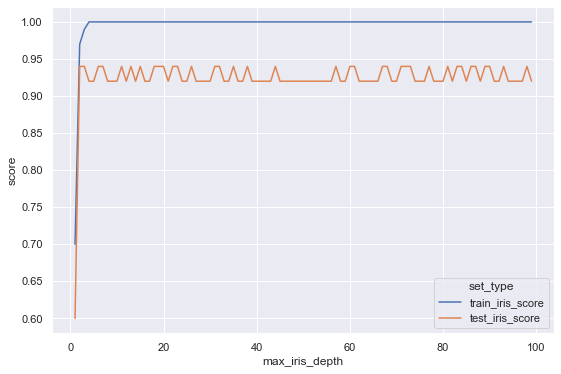

In [25]:

# Визуализация.
sns.lineplot(x='max_iris_depth', y='score', hue='set_type', data=scores_iris_data_long)

# Отображение графиков Matplotlib и Seaborn в PyCharm.
plt.show()